[Indice](index.ipynb) | Previo: [Problema2Cuerpos.SolucionTiempo.VariablesUniversales](07.04.03.00.Problema2Cuerpos.SolucionTiempo.VariablesUniversales.ipynb) | Siguiente: [Problema2Cuerpos.Perturbaciones](07.06.00.00.Problema2Cuerpos.Perturbaciones.ipynb)

## 7.13. Aproximación de dos cuerpos a sistemas jerárquicos
<a id='doscuerpos_aproximacion'></a>

En la [Sección *Motivación*](Not Found#doscuerpos_motivacion) habíamos mencionado que muchos sistemas de N cuerpos en el Universo son en realidad sistema jerarquicos de N cuerpos (Ver Definición \ref{box:def:jerarquicos), es decir la dinámica de estos sistemas puede modelarse como la de $N-1$ sistemas de dos cuerpos interactuantes.  En las secciones anteriores desarrollamos en detalle la solución analítica para el problema de los dos cuerpos y es tiempo de que pongamos a prueba esa afirmación original.

Para ello consideremos nuevamente el sistema que habíamos estudiado numéricamente al principio del capítulo:

In [72]:
sistema=[
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.01,
        r=[-1,0,0],
        v=[0,3,1],
    )
]

Como podemos comprobar examinando las trayectorias de las partículas representadas en la Figura ([code:ncuerpos_jerarquico1](#fig:code:ncuerpos_jerarquico1)) y en la Figura ([code:ncuerpos_jerarquico1_CM](#fig:code:ncuerpos_jerarquico1_CM)), este sistema puede describirse como un sistema anidado de tres cuerpos: 

1. Las partículas 0 y 1 forman un sistema de dos cuerpos central (lo llamaremos el sistema A).
2. Las partícula 2 y el sistema A forma un segundo sistema de dos cuerpos (lo llamaremos el sistema B). 

Las propiedades iniciales del sistema A pueden describirse simplemente usando:

In [208]:
from numpy import array
sistemaA=[
    dict(
        m=10.0,
        r=array([1,0,0]),
        v=array([0,1,0.5])
    ),
    dict(
        m=1.0,
        r=array([1.5,0,0]),
        v=array([0,-3,1]),
    )
]

Para definir las propiedades iniciales del sistema B necesitamos conocer primero la masa total, posición y velocidad del centro de masa del sistema A:

In [209]:
masaA=sistemaA[0]["m"]+sistemaA[1]["m"]
r_CM_A=(sistemaA[0]["m"]*sistemaA[0]["r"]+\
        sistemaA[1]["m"]*sistemaA[1]["r"])/masaA
v_CM_A=(sistemaA[0]["m"]*sistemaA[0]["v"]+\
        sistemaA[1]["m"]*sistemaA[1]["v"])/masaA

In [210]:
print("Sistema A:")
print(f"Masa : = {masaA}")
print(f"Posición del centro de masa : = {r_CM_A}")
print(f"Velocidad del centro de masa : = {v_CM_A}")

Sistema A:
Masa : = 11.0
Posición del centro de masa : = [1.04545455 0.         0.        ]
Velocidad del centro de masa : = [0.         0.63636364 0.54545455]


Con estas propiedades calculadas podemos ahora definir el sistema B:

In [211]:
from numpy import array
sistemaB=[
    dict(
        m=masaA,
        r=r_CM_A,
        v=v_CM_A,
    ),
    dict(
        m=0.01,
        r=array([-1,0,0]),
        v=array([0,3,1]),
    )
]
masaB=sistemaB[0]["m"]+sistemaB[1]["m"]

Podemos ahora utilizar las rutinas desarrolladas en secciones anteriores para predecir la posición de las componentes de cada sistema:

In [213]:
from pymcel.export import propaga_estado
t0=0
t=1.0

#Sistema A
r1,v1,r2,v2,rvecA,vvecA=propaga_estado(sistemaA,t0,t)

#Sistema B
rA,vA,r3,v3,rvecB,vvecB=propaga_estado(sistemaB,t0,t)

Para compararla con las posiciones "reales" resolvamos numéricamente el problema de los N cuerpos:

In [214]:
from pymcel.export import ncuerpos_solucion
ts=[t0,t]
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

Ahora podemos comparar el valor de `r1` y `v1` con el de `rs[0,1,:]` y `vs[0,1,:]`:

In [215]:
print("Partícula 1:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[0,1,:]}")
print(f"\t\tDos cuerpos: {r1}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[0,1,:]}")
print(f"\t\tDos cuerpos: {v1}")
print("Partícula 2:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[1,1,:]}")
print(f"\t\tDos cuerpos: {r2}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[1,1,:]}")
print(f"\t\tDos cuerpos: {v2}")
print("Partícula 3:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[2,1,:]}")
print(f"\t\tDos cuerpos: {r3}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[2,1,:]}")
print(f"\t\tDos cuerpos: {v3}")

Partícula 1:
	Posición:
		N cuerpos: [1.0048383  0.65569534 0.54317083]
		Dos cuerpos: [1.00588816 0.65527116 0.5430911 ]
	Velocidad:
		N cuerpos: [0.21350298 0.9523843  0.50633134]
		Dos cuerpos: [0.2152712  0.95124402 0.5060945 ]
Partícula 2:
	Posición:
		N cuerpos: [1.4400009  0.44762822 0.56917975]
		Dos cuerpos: [1.44111843 0.44728838 0.56908895]
	Velocidad:
		N cuerpos: [-2.15539786 -2.51097523  0.93917367]
		Dos cuerpos: [-2.15271202 -2.51244021  0.93905503]
Partícula 3:
	Posición:
		N cuerpos: [0.16161001 2.54183689 0.91119156]
		Dos cuerpos: [0.15798609 2.54292744 0.91210143]
	Velocidad:
		N cuerpos: [2.03681019 1.71322222 0.75129016]
		Dos cuerpos: [2.03238481 1.71734141 0.75333489]


La coincidencia no es perfecta pero no hay que minimizar este "logro" increíble.  Recordemos que estamos comparando aquí una solución analítica (la de dos problemas de dos cuerpos) con una solución completamente numérica (la del sistema completo.)  Ambas soluciones son completamente independientes, y aún así, al menos para este sistema conseguimos calcular posiciones y velocidades con una precisión relativa del orden del 1%.

Una comparación gráfica entre las dos soluciones hace más notable lo conseguido:

<IPython.core.display.Javascript object>


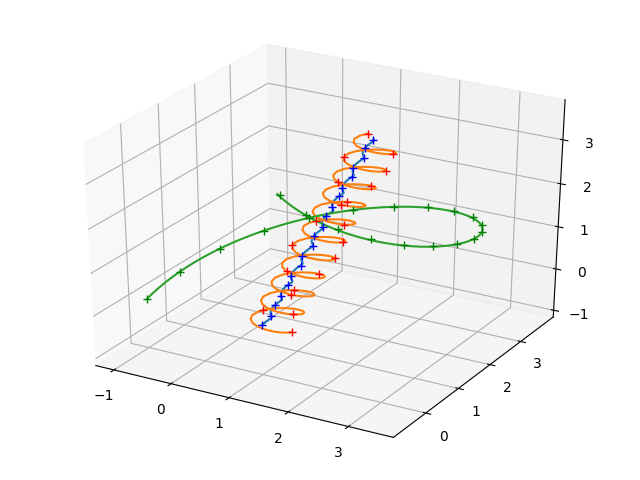

In [193]:
from pymcel.export import propaga_estado
from numpy import linspace

#Ventana de integración
t0=0.0
T=5.0

#Solución al problema de los N cuerpos
from pymcel.export import ncuerpos_solucion
ts=linspace(t0,T,200)
rs_num,vs_num,rps_num,vps_num,constantes=ncuerpos_solucion(sistema,ts)

from numpy import zeros_like
rs_aprox=zeros_like(rs_num)
Nt=20
ts=linspace(t0,T,Nt)
for i,t in enumerate(ts):
    #Sistema A
    ra1,va1,ra2,va2,ravecA,vavecA=propaga_estado(sistemaA,t0,t)

    #Sistema B
    raA,vaA,ra3,va3,ravecB,vavecB=propaga_estado(sistemaB,t0,t)
    
    rs_aprox[0,i]=ra1
    rs_aprox[1,i]=ra2
    rs_aprox[2,i]=ra3
    
#Grafíco
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs_num,vs_num)
ax=fig.gca()

ax.plot(rs_aprox[0,:Nt,0],rs_aprox[0,:Nt,1],rs_aprox[0,:Nt,2],'b+')
ax.plot(rs_aprox[1,:Nt,0],rs_aprox[1,:Nt,1],rs_aprox[1,:Nt,2],'r+')
ax.plot(rs_aprox[2,:Nt,0],rs_aprox[2,:Nt,1],rs_aprox[2,:Nt,2],'g+')



<a id='fig:07.05.00.00.Problema2Cuerpos.AproximacionJerarquico_90'></a><center><b>Figura 7.90.</b> Comparación entre la solución numérica a un problema de 3 cuerpos (líneas continuas) y su aproximación como un sistema jerarquico formado por dos subsistemas de dos cuerpos (cruces).</center>

¿Podemos mejorar de alguna manera la aproximación obtenida aquí? Hay una manera de hacerlo para este sistema, al menos en el caso de las predicciones de los vectores de estado de los cuerpos 1 y 2.  Para ello debemos primero reconocer que en el sistema B la posición del centro de masa del sistema A describe una trayectoria elíptica.  Sin embargo, en el sistema A (en el que se ha asumido que la tercera partícula no existe), ese mismo centro de masa se mueve siguiendo una trayectoria rectilinea. Es obvio que en la realidad la trayectoria del que llamamos aquí el "centro de masa" de las partículas 1 y 2, no sigue una trayectporia tan simple, debido naturalmente a la presencia perturbadora de la partícula 3.

Una mejor aproximación a la posición de las partículas 1 y 2 se puede obtener entonces si usamos los vectores relativos `rvecA` y `vvecA` que obtuvimos con la solución al problema de los dos cuerpos en el sistema A, pero en lugar de asumir que están referidos a un centro de masa que se mueve inercialmente, lo hacemos al centro de masa cuyo movimiento es más complejo y que resulta de la interacción con la partícula 3 (vectores `rA` y `vA`):

In [87]:
r1=rA+sistemaA[1]["m"]/masaA*rvecA
r2=rA-sistemaA[0]["m"]/masaA*rvecA

v1=vA+sistemaA[1]["m"]/masaA*vvecA
v2=vA-sistemaA[0]["m"]/masaA*vvecA

In [88]:
print("Partícula 1:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[0,1,:]}")
print(f"\t\tDos cuerpos: {r1}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[0,1,:]}")
print(f"\t\tDos cuerpos: {v1}")
print("Partícula 2:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[1,1,:]}")
print(f"\t\tDos cuerpos: {r2}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[1,1,:]}")
print(f"\t\tDos cuerpos: {v2}")

Partícula 1:
	Posición:
		N cuerpos: [1.0048383  0.65569534 0.54317083]
		Dos cuerpos: [1.00483544 0.65568668 0.54317101]
	Velocidad:
		N cuerpos: [0.21350298 0.9523843  0.50633134]
		Dos cuerpos: [0.21342358 0.95241007 0.50631874]
Partícula 2:
	Posición:
		N cuerpos: [1.4400009  0.44762822 0.56917975]
		Dos cuerpos: [1.44006572 0.4477039  0.56916886]
	Velocidad:
		N cuerpos: [-2.15539786 -2.51097523  0.93917367]
		Dos cuerpos: [-2.15455965 -2.51127416  0.93927927]


Obtenemos inmediatamente un incremento sustancial en la precisión de nuestras predicciones para este sitema: pasamos de predicciones con precisiones cercanas al 1% a unas nuevas que coinciden con la solución numérica en un nivel igual o inferior al 0.01%.

Como vemos este tipo de correcciones de "segundo orden" pueden mejorar sustancialmente las predicciones de los vectores de estado, al menos de una parte de las partículas del sistema (en nuestro ejemplo, la precisión del vector de estado de la partícula 3 no fue mejorada en lo absoluto.)  Sin embargo, no existe una regla general que indique qué correcciones exactamente debemos aplicar y cada sistema debe analizarse separadamente. 

> **Un poco de historia: Kepler y la mecánica celeste de precisión.**<a id=''></a> La mecánica celeste de precisión comenzó en el año 1600 cuando Johannes Kepler se unió al equipo de Tycho Brahe con la tarea expresa de usar los datos acumulados por este último (o al menos una parte de ellos) para poner a prueba modelos matemáticos alternativos al modelo Ptolemaico.  

> A lo largo de cerca de 20 años, Tycho había acumulado observaciones de los planetas, las estrellas e incluso de algunos cometas, usando instrumentos enormes de alta precisión (ver Figura ([tycho_instrumentos](#fig:tycho_instrumentos)).)  Mientras que en los siglos que precedieron a Tycho, la precisión de las observaciones astronómicas (realizadas normalmente con pequeños cuadrantes, sextantes, astrolabios y otros instrumentos) era en el mejor de los casos de varios minutos de arco, la mayoría de las observaciones de Tycho alcanzaba una precisión cercana al minuto de arco y en algunos casos llegaba a ser de unas decenas de segundos de arco (al menos para las posiciones de las estrellas.) 

> Ni el modelo Ptolemaico del universo, que había sido usado por más de 1500 años para las predicciones astronómicas, ni el más reciente modelo Copernicano podían predecir con la precisión conseguida por los instrumentos de Tycho, las posiciones observadas de los planetas.  Fue precisamente buscando mejorar la precisión de estas predicciones, como Kepler descubrió finalmente sus leyes del movimiento planetario y sembro con ellas la semilla de la mecánica celeste en el fertil suelo intelectual de los 1600.  

> No debemos sin embargo olvidar que la descripción de las órbitas planetarias como lo hizo Kepler, asumiendo que son elipses con foco en el Sol (o en la Tierra para el caso de la Luna), no es otra cosa que una aproximación de dos cuerpos a un sistema jerarquico, como lo hemos descrito en esta sección (en particular el sistema solar puede catalogarse como un *sistema central* en las categorías introducidas en la [Sección *Motivación*](Not Found#doscuerpos_motivacion).) 

> En esta aproximación Kepler asumió, sin saberlo, que el sistema solar, que en aquel tiempo estaba formado por solo 8 cuerpos, el Sol, Mercurio, Venus, la Tierra, la Luna, Marte, Júpiter y Saturno, era en realidad un sistema jerarquico de 7 pares de cuerpos: Sol-Mercurio, Sol-Venus, Sol-Tierra, Tierra-Luna, Sol-Marte, Sol-Júpiter y Sol-Saturno.

> El éxito de la teoría de Kepler al predecir las posiciones planetarias (incluyendo la de la Luna) con una precisión inferior al minuto de arco, fue la primera demostración en la historia del poder que tiene el problema de los dos cuerpos en la descripción de sistemas de N cuerpos.

<a id='fig:tycho_instrumentos'></a>![Este grabado de 1598 muestra el gran cuadrante mural de Tycho Brahe en *Uraniburgo*, su observatorio astronómico en la isla Hven en Dinámarca. Con este y otra decena de enormes instrumentos, Tycho realizó por más de 20 años observaciones de gran precisión de planetas, estrellas y cometas, que a la larga revolucionarían, no solo la mecánica celeste, sino también la astronomía en general. Crédito: Royal Library.++t!++0.5++\label{fig:tycho_instrumentos}](./figures/vertical_tycho_instrumentos.png)

<center><b>Figura 7.91</b>. Este grabado de 1598 muestra el gran cuadrante mural de Tycho Brahe en *Uraniburgo*, su observatorio astronómico en la isla Hven en Dinámarca. Con este y otra decena de enormes instrumentos, Tycho realizó por más de 20 años observaciones de gran precisión de planetas, estrellas y cometas, que a la larga revolucionarían, no solo la mecánica celeste, sino también la astronomía en general. Crédito: Royal Library.</center>

### 7.13.1. Predicciones en el Sistema Solar
<a id='doscuerpos_sistema_solar'></a>

Podemos usar todo lo visto en este capítulo, para poner a prueba la afirmación de que es posible predecir con una precisión aceptable para los estándares astronómicos del pasado (cercana o inferior a 1 minuto de arco), la posición de los planetas en el Sistema Solar.  Para ello podemos asumir que nuestro sistema planetario, que en realidad esta formado por decenas de cuerpos de masas no despreciables, puede describirse como un sistema jerárquico de pares de dos cuerpos: Sol-Mercurio, Sol-Venus, Sol-Tierra, Sol-Marte, Sol-Asteroide, etc.  

Podemos asumir (como lo hicieron implícitamente Kepler y sus contemporáneos) que la masa del Sol en estos pares de partículas es infinitamente mayor que la de los cuerpos más pequeño, $m_1=m_\odot\approx M$.  Con esta aproximación, el Sol se puede asumir fijo en el centro de masa del sistema (ver Ecs. [r1_r2_r](#mjx-eqn-eq%3Ar1_r2_r) y [v1_v2_v](#mjx-eqn-eq%3Av1_v2_v)):

$$
\begin{array}{rcl}
\vec r_\odot & \approx & 0\\
\vec v_\odot & \approx & 0\\
\end{array}
$$
mientras que el estado de los otros cuerpos es simplemente igual al vector de estado relativo en el sistema:

$$
\begin{array}{rcl}
\vec r_\mathrm{planeta} & \approx & \vec r\\
\vec v_\mathrm{planeta} & \approx & \vec v
\end{array}
$$

Para poner a prueba la aproximación calcularemos a continuación los vectores de estado de la Tierra y Marte y deduciremos a partir de ellos la posición en el cielo del último planeta que después compararemos con su posición real obtenida con predicciones modernas de alta precisión.

Comencemos entonce por determinar el vector de estado de la Tierra y Marte respecto al Sol en una fecha específica.  Para ello podemos valernos de la rutina `spkezr` que introdujimos en el [Capítulo *El problema de los N cuerpos*](06.00.00.00.ProblemaNCuerpos.ipynb#problema_ncuerpos).

In [125]:
from spiceypy import furnsh
furnsh("pymcel/data/de430.tpc")
furnsh("pymcel/data/de430.bsp")

#Fecha de referencia J2000.0
t0=0

#Parametro gravitacional del sistema
from spiceypy import bodvrd
mu=bodvrd("SUN","GM",1)[1][0]

#Vectores de estado de la Tierra y Marte
from spiceypy import spkezr
tierra,tluz=spkezr("EARTH_BARYCENTER",t0,"ECLIPJ2000","None","SUN")
rtierra0=tierra[:3]
vtierra0=tierra[3:]
marte,tluz=spkezr("MARS_BARYCENTER",t0,"ECLIPJ2000","None","SUN")
rmarte0=marte[:3]
vmarte0=marte[3:]

In [126]:
print("Estado inicial de la Tierra (SPICE):")
print(f"\tPosición: {rtierra0}")
print(f"\tVelocidad: {vtierra0}")
print("Estado inicial de Marte (SPICE):")
print(f"\tPosición: {rmarte0}")
print(f"\tVelocidad: {vmarte0}")

Estado inicial de la Tierra (SPICE):
	Posición: [-2.65025770e+07  1.44693956e+08 -1.70505187e+02]
	Velocidad: [-2.97864408e+01 -5.47817684e+00  4.19797701e-05]
Estado inicial de Marte (SPICE):
	Posición: [ 2.08048141e+08 -2.00705251e+06 -5.15628899e+06]
	Velocidad: [ 1.16267242 26.29606454  0.52229699]


Ahora usaremos la rutina `propaga_f_g` que introdujimos en la [Sección *Las funciones $f$ y $g$*](07.04.03.00.Problema2Cuerpos.SolucionTiempo.VariablesUniversales.ipynb#funciones_fg) para propagar las posiciones de la Tierra y Marte, 180 días (aproximadamente 6 meses) en el futuro:

<a id='code:prediccion_ss'></a>

In [186]:
#30 días más tarde
t=180*86400

#Propaga la posición de la Tierra
from pymcel.export import propaga_f_g
prediccion_tierra=propaga_f_g(mu,rtierra0,vtierra0,t0,t,verbose=True)
rtierra=prediccion_tierra[5]
vtierra=prediccion_tierra[6]

#Propaga la posición de Marte
prediccion_marte=propaga_f_g(mu,rmarte0,vmarte0,t0,t,verbose=True)
rmarte=prediccion_marte[5]
vmarte=prediccion_marte[6]

In [187]:
print("Estado propagado de la Tierra (aproximación):")
print(f"\tPosición: {rtierra}")
print(f"\tVelocidad: {vtierra}")
print("Estado inicial de Marte (aproximación):")
print(f"\tPosición: {rmarte}")
print(f"\tVelocidad: {vmarte}")

Estado propagado de la Tierra (aproximación):
	Posición: [ 2.12651481e+07 -1.50593536e+08  1.84746693e+02]
	Velocidad: [ 2.90111873e+01  4.05388504e+00 -3.91059499e-05]
Estado inicial de Marte (aproximación):
	Posición: [-3.75596491e+07  2.34997200e+08  5.84626235e+06]
	Velocidad: [-23.00765883  -1.7690655    0.52851442]


Podemos comparar las predicciones realizadas con la teoría de dos cuerpos con aquellas muy precisas calculadas con las integraciones numéricas implícitas en los datos de `SPICE`:

In [188]:
#Vectores de estado de la Tierra y Marte
tierra,tluz=spkezr("EARTH_BARYCENTER",t,"ECLIPJ2000","None","SUN")
marte,tluz=spkezr("MARS_BARYCENTER",t,"ECLIPJ2000","None","SUN")

In [189]:
print("Estado propagado de la Tierra (SPICE):")
print(f"\tPosición: {tierra[:3]}")
print(f"\tVelocidad: {tierra[3:]}")
print("Estado inicial de Marte (SPICE):")
print(f"\tPosición: {marte[:3]}")
print(f"\tVelocidad: {marte[3:]}")

Estado propagado de la Tierra (SPICE):
	Posición: [ 2.12704637e+07 -1.50594283e+08  2.98450430e+02]
	Velocidad: [ 2.90108118e+01  4.05407503e+00 -2.81172149e-05]
Estado inicial de Marte (SPICE):
	Posición: [-3.75381027e+07  2.35025828e+08  5.84580453e+06]
	Velocidad: [-23.00526594  -1.7643746    0.52849927]


Las coincidencias en este caso con los resultados obtenidos con la teoría de los dos cuerpos (Alg. [prediccion_ss](#code:prediccion_ss)) son sencillamente notables.  Pero vayamos más lejos y hagamos la comparación que nos propusimos hacer desde el principio, es decir, calculemos la diferencia entre la posición de Marte en el cielo predicha con la teoría de dos cuerpos y la real (que asumiremos es la que provee `SPICE`.)

Para ello nos valdremos de una nueva rutina `reclat` que permite convertir un vector posición en sus correspondientes coordenadas de latitud y longitud referidas al sistema de referencia usado (en este caso longitud y latitud eclíptica):

In [190]:
from spiceypy import reclat
#Distancia a Marte, longitud y latitud eclíptica del planeta
dist,long,lat=reclat(marte[:3]-tierra[:3])
#Valores usando la teoría aproximada
dist_aprox,long_aprox,lat_aprox=reclat(rmarte-rtierra)

In [191]:
from numpy import pi
print("Distancia:")
print(f"\tReal: {dist} km")
print(f"\tAprox.: {dist_aprox} km")
print("Longitud eclíptica:")
print(f"\tReal: {long*180/pi:.7f} grados")
print(f"\tAprox.: {long_aprox*180/pi:.7f} grados")
print(f"\tDiferencia: {abs(long_aprox-long)*180/pi*60:.7f} arcmin")
print("Latitud eclíptica:")
print(f"\tReal: {lat*180/pi:.7f} grados")
print(f"\tAprox.: {lat_aprox*180/pi:.7f} grados")
print(f"\tDiferencia: {abs(lat_aprox-lat)*180/pi*60:.7f} arcmin")

Distancia:
	Real: 390122400.20565176 km
	Aprox.: 390095819.98641676 km
Longitud eclíptica:
	Real: 98.6710192 grados
	Aprox.: 98.6740266 grados
	Diferencia: 0.1804482 arcmin
Latitud eclíptica:
	Real: 0.8585392 grados
	Aprox.: 0.8586816 grados
	Diferencia: 0.0085473 arcmin


Como lo observo Kepler, el error en la posición en el cielo se mantiene, por lo menos durante 6 meses por debajo de 1 minuto de arco.  En la Figura ([code:error_posicion_marte](#fig:code:error_posicion_marte))) se muestra el error calculado en la posición en el cielo, vista desde la Tierra, predicha para el planeta rojo con la teoría de dos cuerpos.

<a id='code:error_posicion_marte'></a>

<IPython.core.display.Javascript object>


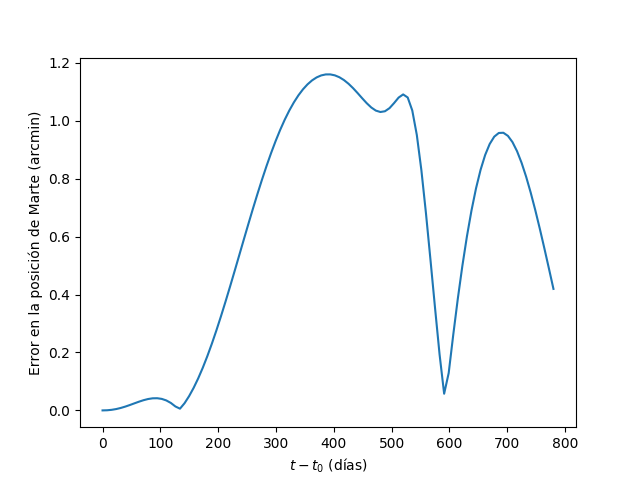

In [192]:
from numpy import linspace

#Tiempos por un período sinódico completo de Marte
ts=linspace(0,780*86400,100)
errores=[]

for t in ts:
    #Propaga la posición de la Tierra
    from spiceypy import prop2b
    prediccion_tierra=prop2b(mu,list(rtierra0)+list(vtierra0),t-t0)
    rtierra=prediccion_tierra[:3]
    vtierra=prediccion_tierra[3:]

    #Propaga la posición de Marte
    from spiceypy import prop2b
    prediccion_marte=prop2b(mu,list(rmarte0)+list(vmarte0),t-t0)
    rmarte=prediccion_marte[:3]
    vmarte=prediccion_marte[3:]
    
    #Calcula las coordenadas predichas
    dist_aprox,long_aprox,lat_aprox=reclat(rmarte-rtierra)
    
    #Obtiene las coordenadas reales de Marte y la Tierra
    tierra,tluz=spkezr("EARTH_BARYCENTER",t,"ECLIPJ2000","None","SUN")
    marte,tluz=spkezr("MARS_BARYCENTER",t,"ECLIPJ2000","None","SUN")
    dist,long,lat=reclat(marte[:3]-tierra[:3])

    #Error en  la posición en minutos de arco
    long_error=abs(long-long_aprox)*180/pi*60
    lat_error=abs(lat-lat_aprox)*180/pi*60
    errores+=[(long_error**2+lat_error**2)**0.5]

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(ts/86400,errores);
ax.set_xlabel("$t-t_0$ (días)");
ax.set_ylabel("Error en la posición de Marte (arcmin)");



<a id='fig:07.05.00.00.Problema2Cuerpos.AproximacionJerarquico_92'></a><center><b>Figura 7.92.</b> Error en la predicción de la posición de Marte en el cielo, tal y como es visto desde la Tierra, usando la teoría de los dos cuerpos como aproximación al movimiento de ambos planetas.  El error es calculado a lo largo de un período sinódico completo del planeta rojo (780 días.)</center>

### 7.13.2. Evolución de los elementos orbitales osculatrices
<a id='doscuerpos_evolucion_elementos'></a>

Hay un "fenómeno" muy interesante que permite entender en parte porque las predicciones de la teoría de los dos cuerpos usadas aquí para predecir el estado de las partículas en sistemas jerarquicos de N cuerpos, no son más precisas.  De acuerdo con lo que vimos en la [Sección *La órbita osculatriz*](07.03.00.00.Problema2Cuerpos.OrbitaEspacio.ipynb#orbita_osculatriz) a cada vector de estado (sea este el vector de estado de una partícula o el del sistema relativo) podemos asociar un conjunto de elementos orbitales osculatrices. ¿Cómo son los elementos osculatrices de las partículas de los sistemas jerarquicos estudiados en esta sección? 

Consideremos por ejemplo el sistema ficticio del principio.  Obtengamos primero la solución numérica a las ecuaciones de movimiento de lo describen:

In [216]:
from numpy import linspace
ts=linspace(0.0,10.0,200)
from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

Para calcular los elementos osculatrices, obtengamos primero la posición del centro de masa de los sistemas A y B en los que descompusimos el sistema completo:

In [219]:
#Sistema A
r_CM_A=(sistema[0]["m"]*rs[0]+sistema[1]["m"]*rs[1])/masaA
v_CM_A=(sistema[0]["m"]*vs[0]+sistema[1]["m"]*vs[1])/masaA
#Sistema B
r_CM_B=(sistemaB[0]["m"]*r_CM_A+sistemaB[1]["m"]*rs[2])/masaB
v_CM_B=(sistemaB[0]["m"]*v_CM_A+sistemaB[1]["m"]*vs[2])/masaB

Para calcular los elementos osculatrices de la partícula 3, por ejemplo, debemos primero expresar su vector de estado respecto al centro de masa de su respectivo subsistema (sistema B) y de allí usar los procedimientos matemáticos que vimos en la [Sección *Determinación de la órbita*](07.03.00.00.Problema2Cuerpos.OrbitaEspacio.ipynb#determinacion_orbita) y que se implementan (como vimos en la [Sección *El problema de los dos cuerpos en `SPICE`*](Not Found#doscuerpos_spice)) con la rutina `oscelt`:

In [274]:
r3_CM=rs[2]-r_CM_B
v3_CM=vs[2]-v_CM_B

Es=[]
for i,t in enumerate(ts):
    from spiceypy import oscelt
    Es+=[oscelt(list(r3_CM[i])+list(v3_CM[i]),t,masaB)]

from numpy import array
Es=array(Es)

Podemos ahora graficar los elementos orbitales $q$, $e$, $i$, $\Omega$, $\omega$ como función del tiempo:

<a id='code:variacion_elementos'></a>

<IPython.core.display.Javascript object>


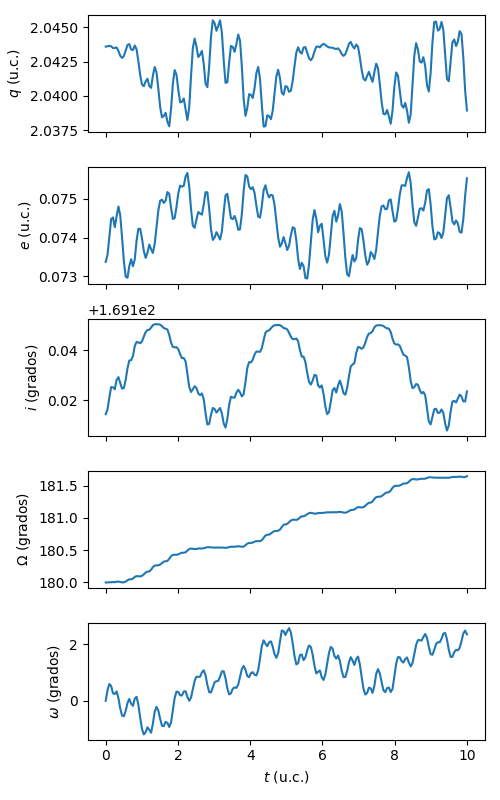

In [284]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(5,1,figsize=(5,8),sharex=True)

#Periapsis
axs[0].plot(ts,Es[:,0])
axs[0].set_ylabel("$q$ (u.c.)")
#Excentricidad
axs[1].plot(ts,Es[:,1])
axs[1].set_ylabel("$e$ (u.c.)")
#Inclinación
axs[2].plot(ts,Es[:,2]*180/pi)
axs[2].set_ylabel("$i$ (grados)")
#Longitud del nodo ascendente
axs[3].plot(ts,Es[:,3]*180/pi)
axs[3].set_ylabel("$\Omega$ (grados)")
#Argumento del periapsis
cond=Es[:,4]>pi
Es[cond,4]=Es[cond,4]-2*pi
axs[4].plot(ts,Es[:,4]*180/pi)
axs[4].set_ylabel("$\omega$ (grados)")

#Decoración
axs[-1].set_xlabel("$t$ (u.c.)")
fig.tight_layout()

<a id='code:variacion_elementos'></a><center><b>Figura 7.93.</b> </center>

Como vemos en la Figura ([code:variacion_elementos](#fig:code:variacion_elementos)) el valor de los elementos orbitales osculatrices de la partícula 3 no es constante por lo que no es de extrañar que las predicciones que hicimos de la posición de esa partícula con la teoría de los dos cuerpos, y que esencialmente asumen que la órbita tiene elementos constantes e iguales a aquellos en $t=t_0$, no sean muy precisos.

Pero existe un elemento aún más interesante: las variaciones de los elementos no parecen ser "arbitrarias" o "aleatorias.  En el caso de $q$, $e$, $i$ y $\omega$ los elementos "oscilan" de formas aparenetemente predecibles alrededor de un valor promedio, con amplitudes muy pequeñas y frecuencias similares. Por su parte, el valor de $\Omega$ parece aumentar monótonamente, con algunos cambios en la tasa de variación que ocurren también a intervalos regulares de tiempo.

### 7.13.3. Un ejemplo real: los elementos osculatrices de la Luna
<a id='elementos_luna'></a>

El curioso comportamiento observado en el sistema ficticio estudiado en esta sección, es también observado en sistemas astronómicos reales.  El caso más notable en el Sistema Solar es el de la Luna.  En el algoritmo a continuación calculamos los elementos osculatrices de nuestro satélites, relativos al centro de masa del sistema Tierra-Luna, durante un año completo.

In [362]:
#Masa del sistema
from spiceypy import bodvrd
mu=bodvrd("EARTH","GM",1)[1][0]+bodvrd("MOON","GM",1)[1][0]

from numpy import linspace
ts=linspace(0,180*86400,100)
Es=[]
for t in ts:
    #Vector de estado de la Luna
    from spiceypy import spkezr
    luna,tluz=spkezr("MOON",t,"J2000","None","EARTH_BARYCENTER")
    
    #Elementos osculatrices
    from spiceypy import oscelt
    Es+=[oscelt(luna,t,mu)]

from numpy import array
Es=array(Es)

Una gráfica de los elementos osculatirces calculados aquí como función del tiempo (medido en *periodos sinódicos*, es decir el tiempo de Luna llena a Luna llena) se muestra en la Figura ([code:variacion_elementos](#fig:code:variacion_elementos)).  Como vemos allí y como observamos también en el sistema ficticio, existen variaciones periódicas en los elementos orbitales de la Luna.  Adicionalmente, el período de variación de la excentricidad y la distancia al periapsis de la Luna es exactamente igual al período sinódico: la excentricidad, por ejemplo siempre es mínima cuando la Luna esta cerca a la luna nueva. 

<a id='code:variacion_elementos'></a>

<IPython.core.display.Javascript object>


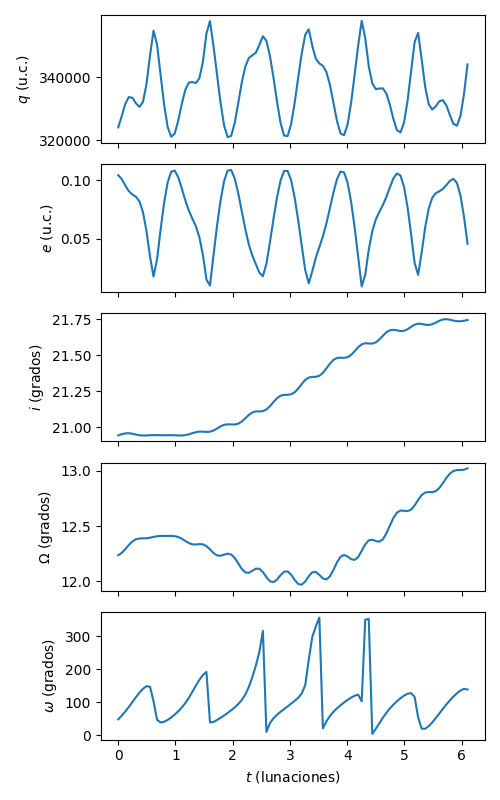

In [364]:
import matplotlib.pyplot as plt
fig,axs=plt.subplots(5,1,figsize=(5,8),sharex=True)

#Escalados
T=29.5*86400

#Periapsis
axs[0].plot(ts/T,Es[:,0])
axs[0].set_ylabel("$q$ (u.c.)")
#Excentricidad
axs[1].plot(ts/T,Es[:,1])
axs[1].set_ylabel("$e$ (u.c.)")
#Inclinación
axs[2].plot(ts/T,Es[:,2]*180/pi)
axs[2].set_ylabel("$i$ (grados)")
#Longitud del nodo ascendente
axs[3].plot(ts/T,Es[:,3]*180/pi)
axs[3].set_ylabel("$\Omega$ (grados)")
#Argumento del periapsis
axs[4].plot(ts/T,Es[:,4]*180/pi)
axs[4].set_ylabel("$\omega$ (grados)")

#Decoración
axs[-1].set_xlabel("$t$ (lunaciones)")
fig.tight_layout()



<a id='code:variacion_elementos--hide_input'></a><center><b>Figura 7.94.</b> Variaciones de los elementos orbitales osculatrices de la Luna respecto al baricentro del sistema Tierra-Luna.  </center>

¿De qué dependen estas variaciones en los elementos osculatrices? ¿cómo puede predecirse y de qué manera su predicción puede ayudarnos a describir sistemas jerárquicos de N cuerpos?  La solución a este problema obsesionó a Newton hasta el final de su vida y fue necesario una nueva generación de matemáticos en los 1700, entre ellos Joseph Louis Lagrange, para resolver satisfactoriamente el problema.  En la siguiente sección abordaremos algunas nociones básicas del problema. Un desarrollo a fondo del mismo es parte de textos más avanzados de Mecánica Celeste. 

[Indice](index.ipynb) | Previo: [Problema2Cuerpos.SolucionTiempo.VariablesUniversales](07.04.03.00.Problema2Cuerpos.SolucionTiempo.VariablesUniversales.ipynb) | Siguiente: [Problema2Cuerpos.Perturbaciones](07.06.00.00.Problema2Cuerpos.Perturbaciones.ipynb)